In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import math
%matplotlib inline

In [2]:
df_bus = pd.read_json('yelp_academic_dataset_business.json', lines= True, orient= 'columns')
df_rev = pd.read_json('yelp_academic_dataset_review.json', lines= True, orient= 'columns')

In [3]:
# Map City and Categories

df_cityfilter = df_bus[['business_id','city', 'categories']]

df_cityfilter.set_index('business_id',inplace = True)
df_cityfilter


,city,categories
business_id,,
5UmKMjUEUNdYWqANhGckJw,Dravosburg,"[Fast Food, Restaurants]"
UsFtqoBl7naz8AVUBZMjQQ,Dravosburg,[Nightlife]
cE27W9VPgO88Qxe4ol6y_g,Bethel Park,"[Active Life, Mini Golf, Golf]"
mVHrayjG3uZ_RLHkLj-AMg,Braddock,"[Bars, American (New), Nightlife, Lounges, Res..."
mYSpR_SLPgUVymYOvTQd_Q,Braddock,"[Active Life, Golf]"
...,...,...
m7-3lyY0CJEhePfJKWtD3w,Las Vegas,"[Bridal, Fashion, Shopping, Formal Wear]"
g0vvhkZWZKlwF8BUeSPaTA,Goodyear,"[Mexican, Restaurants]"
46L_7y9QXffPpOaXNLX8hg,Phoenix,"[Car Wash, Automotive]"


In [4]:
Dict = df_cityfilter.to_dict()
Dict

{'city': {'5UmKMjUEUNdYWqANhGckJw': 'Dravosburg',
  'UsFtqoBl7naz8AVUBZMjQQ': 'Dravosburg',
  'cE27W9VPgO88Qxe4ol6y_g': 'Bethel Park',
  'mVHrayjG3uZ_RLHkLj-AMg': 'Braddock',
  'mYSpR_SLPgUVymYOvTQd_Q': 'Braddock',
  'KayYbHCt-RkbGcPdGOThNg': 'Carnegie',
  'b12U9TFESStdy7CsTtcOeg': 'Carnegie',
  'Sktj1eHQFuVa-M4bgnEh8g': 'Carnegie',
  '3ZVKmuK2l7uXPE6lXY4Dbg': 'Carnegie',
  'QoDa50dc7g62xciFygXB9w': 'Pittsburgh',
  '1_lU0-eSWJCRvNGk78Zh9Q': 'Carnegie',
  '_qopVQ6_Mz6W7-Pmbi56GQ': 'Carnegie',
  'wJr6kSA5dchdgOdwH6dZ2w': 'Carnegie',
  'yXuao0pFz1AxB21vJjDf5w': 'Carnegie',
  'LLJMI-_fSp6OYQuY4rwarw': 'Carnegie',
  'F04xyOUA2xnUoCiWpx9iJA': 'Carnegie',
  'Cdcus0NADzyY3XiJM2O5Sg': 'Carnegie',
  'fNGIbpazjTRdXgwRY_NIXA': 'Carnegie',
  'b9WZJp5L1RZr4F1nxclOoQ': 'Carnegie',
  'zaXDakTd3RXyOa7sMrUE1g': 'Carnegie',
  'zgy27FSnvwdINfk5cXBIyQ': 'Carnegie',
  'WETE_LykpcnrC1sFcQ5EGg': 'Carnegie',
  '6o3RK6rTcN3nw-j-r2nQmA': 'Carnegie',
  'woOVJ0Z2f6XNCDntHA3b_g': 'Carnegie',
  'rv7CY8G_XibTx82YhuqQ

In [5]:
df_rev['city'] = df_rev['business_id'].map(Dict['city'])
df_rev['categories'] = df_rev['business_id'].map(Dict['categories'])
df_rev['city'] = df_rev['city'].apply(lambda name : name.upper())
#Now, df_rev has all cities in upper letters, so can filter with VEGAS.

In [6]:
#Here we select all the strings that contain 'VEGAS' metropolitan area.
df_revnew = df_rev[df_rev['city'].str.contains('VEGAS', regex=False)]

In [7]:
#Check names of 'city'
pd.unique(df_revnew['city'])

array(['LAS VEGAS', 'NORTH LAS VEGAS', 'N LAS VEGAS', 'N. LAS VEGAS',
       'C LAS VEGAS', 'LAS VEGAS ', 'LAS  VEGAS', 'LAS VEGAS EAST',
       'SOUTH LAS VEGAS', 'NORTH LAS VEGAS ', 'N E LAS VEGAS',
       'N W LAS VEGAS', 'LAKE LAS VEGAS', 'HENDERSON AND LAS VEGAS',
       '110 LAS VEGAS', 'LAS VEGAS, NV', 'LAS VEGAS STRIP',
       'WEST LAS VEGAS', 'LASVEGAS'], dtype=object)

In [8]:
#Check the total numbers of users and businesses.
#len(pd.unique(df_revnew['business_id']))
#len(pd.unique(df_revnew['user_id']))

In [9]:
#For Q1, only need users and businesses in VEGAS area/
df_totals = df_revnew[['user_id','business_id']]
df_totals

,user_id,business_id
201319,3ge0SYg8iuup1JoqilpOZw,F7l0UuTvf_734UMAwsJfkg
201320,_Y1DxYnmu82EGQKBgSsDvw,F7l0UuTvf_734UMAwsJfkg
201321,C4s2oJ3h814KYQkDxeKOdg,F7l0UuTvf_734UMAwsJfkg
201471,fPHLPrymsyb6WSFFKoMrTQ,uzztTCsg3XAKlYqmLO40aw
201472,PV5voYSD43Cn_3gHmxG7DA,uzztTCsg3XAKlYqmLO40aw
...,...,...
2684908,ht_WUs-c9SLCV9Io2ONmVA,m7-3lyY0CJEhePfJKWtD3w
2684909,Sew2-sfVTVsoJTZvGdGDZg,m7-3lyY0CJEhePfJKWtD3w
2684910,6mokcJx9kQyFjpNZC9KpIA,m7-3lyY0CJEhePfJKWtD3w
2684911,Asw3u3tzqQ9EacjZlNdccg,m7-3lyY0CJEhePfJKWtD3w


In [10]:
#Reviews by each user
x = df_totals.groupby('user_id').count()
x = x.reset_index()['business_id']

#Reviews each business received
y = df_totals.groupby('business_id').count()
y = y.reset_index()['user_id']

print(np.mean(x))
print(np.std(x))
print(np.mean(y))
print(np.std(y))

3.2938687235518773
10.808673635685805
51.88175642414099
170.88163744214302


In [11]:
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
from scipy import stats
from scipy.stats import kurtosis, skew
import numpy as np
import warnings
warnings.filterwarnings("ignore")
hfont = {'fontname':'Helvetica'}

#list_of_dists = 'weibull_min','norm','weibull_max','beta','uniform','gamma','expon','lognorm','pearson3','triang'
#list_of_dists = 'alpha','anglit','arcsine','beta','betaprime','bradford','burr','burr12','cauchy','chi','chi2','cosine','dgamma','dweibull','erlang','expon','exponnorm','exponweib','exponpow','f','fatiguelife','fisk','foldcauchy','foldnorm','genlogistic','genpareto','gennorm','genexpon','genextreme','gausshyper','gamma','gengamma','genhalflogistic','gilbrat','gompertz','gumbel_r','gumbel_l','halfcauchy','halflogistic','halfnorm','halfgennorm','hypsecant','invgamma','invgauss','invweibull','johnsonsb','johnsonsu','kstwobign','laplace','levy','levy_l','logistic','loggamma','loglaplace','lognorm','lomax','maxwell','mielke','nakagami','ncx2','ncf','nct','norm','pareto','pearson3','powerlaw','powerlognorm','powernorm','rdist','reciprocal','rayleigh','rice','recipinvgauss','semicircular','t','triang','truncexpon','truncnorm','tukeylambda','uniform','vonmises','vonmises_line','wald','weibull_min','weibull_max'
#print(type(list_of_dists))

In [12]:
##########################################################################################################
########################################RQ.1_Subquestion_1 with outliers ###############################################
##########################################################################################################

No handles with labels found to put in legend.
findfont: Font family ['Helvetica'] not found. Falling back to DejaVu Sans.


Las Vegas mean 3.2938687235518773
Las Vegas standard deviation 10.808690526072553
Las Vegas excess kurtosis of normal distribution (should be 0): 3270.8274003239385
Las Vegas skewness of normal distribution (should be 0): 39.10038626091788


findfont: Font family ['Helvetica'] not found. Falling back to DejaVu Sans.


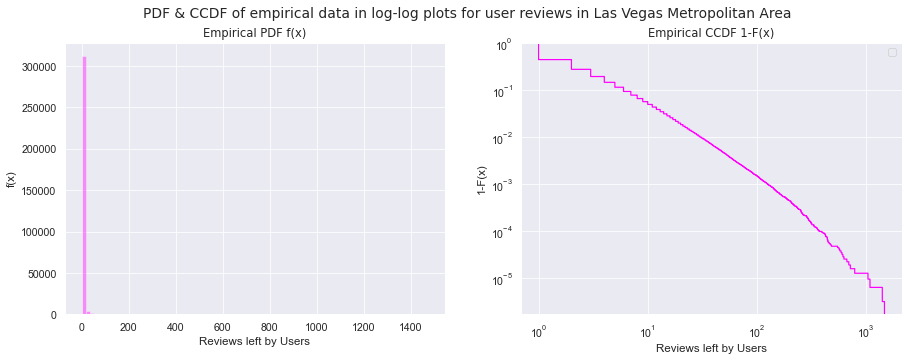

In [13]:
############################################################################################################
#############RQ.1_Subquestion_1 Plotting the empirical CDF & PDF in linear log for the user reviews##################
###########################################################################################################

sns.set(context='paper', style='darkgrid', rc={'figure.facecolor':'white'}, font_scale=1.2)

fig, axes = plt.subplots(1, 2, figsize=(15,5))
fig.suptitle('PDF & CCDF of empirical data in log-log plots for user reviews in Las Vegas Metropolitan Area ', **hfont)



sns.distplot(x, ax=axes[0], color='fuchsia', kde= False, label='Las Vegas', bins = 90)  
sns.ecdfplot(x, ax=axes[1], color='fuchsia', complementary = True)

axes[0].set_title('Empirical PDF f(x)', **hfont)
axes[1].set_title('Empirical CCDF 1-F(x)', **hfont)
axes[0].set(xlabel="Reviews left by Users", ylabel = "f(x)")
axes[1].set(xlabel="Reviews left by Users", ylabel = "1-F(x)")
plt.yscale("log")
plt.xscale("log")
plt.legend()
print ('Las Vegas mean', x.mean())
print('Las Vegas standard deviation',x.std())
print('Las Vegas excess kurtosis of normal distribution (should be 0): {}'.format( kurtosis(x) ))
print('Las Vegas skewness of normal distribution (should be 0): {}'.format( skew(x) ))


plt.show()

[distfit] >fit..
[distfit] >transform..
[distfit] >[norm      ] [0.00 sec] [RSS: 0.0002123] [loc=3.294 scale=10.809]
[distfit] >[expon     ] [0.00 sec] [RSS: 0.0010826] [loc=1.000 scale=2.294]
[distfit] >[pareto    ] [9.41 sec] [RSS: 0.0010694] [loc=-2.731 scale=3.731]
[distfit] >[dweibull  ] [19.9 sec] [RSS: 0.0009110] [loc=1.000 scale=2.569]
[distfit] >[t         ] [9.87 sec] [RSS: 0.0011297] [loc=1.000 scale=0.000]
[distfit] >[genextreme] [32.6 sec] [RSS: 0.0011297] [loc=1.000 scale=0.000]
[distfit] >[gamma     ] [9.23 sec] [RSS: 0.0011297] [loc=1.000 scale=1.545]
[distfit] >[lognorm   ] [20.7 sec] [RSS: 0.0011297] [loc=1.000 scale=0.000]
[distfit] >[beta      ] [17.7 sec] [RSS: 0.0011297] [loc=1.000 scale=2747.667]
[distfit] >[uniform   ] [0.00 sec] [RSS: 0.0011067] [loc=1.000 scale=1473.000]
[distfit] >Compute confidence interval [parametric]
[distfit] >plot..


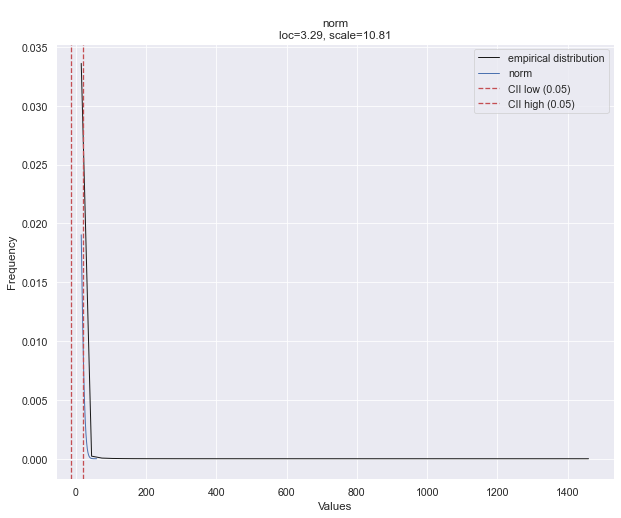

(<Figure size 720x576 with 1 Axes>,
 <AxesSubplot:title={'center':'\nnorm\nloc=3.29, scale=10.81'}, xlabel='Values', ylabel='Frequency'>)

In [14]:
#https://pypi.org/project/distfit/#-Examples
#fitting a distribution using residual sum of squares with outliers
import distfit
from distfit import distfit
dist = distfit()
dist.fit_transform(x)
dist.plot()

        distr       RSS  LLE       loc       scale  \
0        norm  0.000212  NaN  3.293869   10.808674   
1    dweibull  0.000911  NaN       1.0    2.569011   
2      pareto  0.001069  NaN -2.730746    3.730746   
3       expon  0.001083  NaN       1.0    2.293869   
4     uniform  0.001107  NaN       1.0      1473.0   
5     lognorm   0.00113  NaN       1.0         0.0   
6       gamma   0.00113  NaN       1.0    1.544502   
7        beta   0.00113  NaN       1.0  2747.66738   
8           t   0.00113  NaN       1.0         0.0   
9  genextreme   0.00113  NaN       1.0         0.0   

                                       arg  
0                                       ()  
1                    (0.5855381856635451,)  
2                    (3.3031024261600077,)  
3                                       ()  
4                                       ()  
5                     (4.066328470129083,)  
6                 (0.0033272166053076643,)  
7  (0.5761778626106864, 3424.188114262091)  


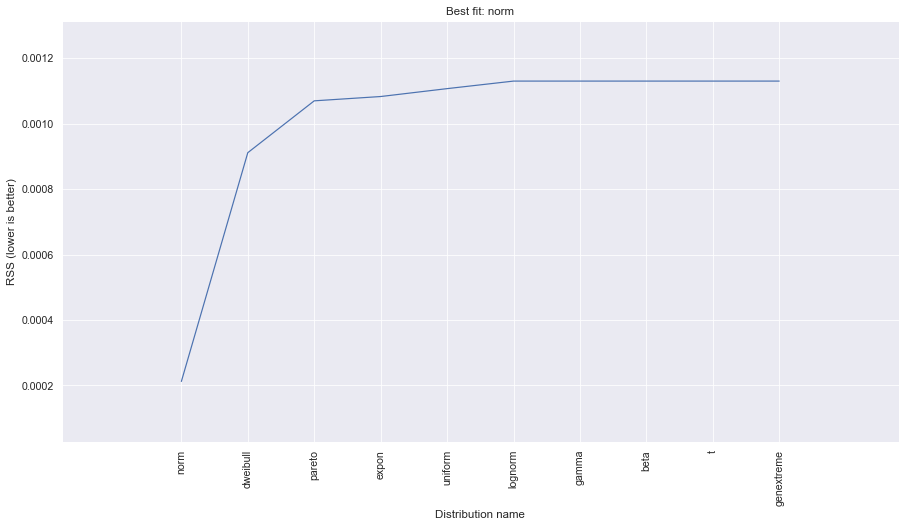

(<Figure size 1080x576 with 1 Axes>,
 <AxesSubplot:title={'center':'Best fit: norm'}, xlabel='Distribution name', ylabel='RSS (lower is better)'>)

In [15]:
# All scores of the tested distributions
print(dist.summary)

# Distribution parameters for best fit
dist.model

# Make plot
dist.plot_summary()

In [16]:
#fitting the best continuous distribution using Kolmogorov test with outliers 
#Distribution fit for business reviews 
#https://medium.com/@amirarsalan.rajabi/distribution-fitting-with-python-scipy-bb70a42c0aed
list_of_dists = 'beta','betaprime','cauchy','chi','dweibull','expon','exponnorm','exponweib','exponpow','fisk','genpareto','gennorm','genexpon','genextreme','gamma','gengamma','invgamma','invgauss','invweibull','loggamma','loglaplace','lognorm','ncx2','ncf','nct','norm','pareto','powerlaw','powerlognorm','powernorm','weibull_min','weibull_max'

results = []
for i in list_of_dists:
    dist = getattr(stats, i)
    param = dist.fit(x)
    a = stats.kstest(x, i, args=param)
    results.append((i,a[0],a[1]))
    print('Parameters for', i, 'are:', param)
    
results.sort(key=lambda x:float(x[2]), reverse=True)
for j in results:
    print("{}: statistic={}, pvalue={}".format(j[0], j[1], j[2]))

Parameters for beta are: (0.5761778626106864, 3424.188114262091, 0.9999999999999999, 2747.6673799443406)
Parameters for betaprime are: (0.6904016923372104, 0.6843078101584679, 0.9999999999999999, 0.17284070649928046)
Parameters for cauchy are: (0.9999999999999448, 3.0764252137516605e-13)
Parameters for chi are: (0.09788517276563283, 0.9999999999999999, 15.971660665756641)
Parameters for dweibull are: (0.5855381856635451, 0.9999999999999999, 2.569011025557738)
Parameters for expon are: (1.0, 2.2938687235518773)
Parameters for exponnorm are: (5473.502238182318, 0.9982855196617169, 0.000418187797469918)
Parameters for exponweib are: (0.42390910214306865, 1.01668655255863, 0.9999999999999999, 2.864382146920467)
Parameters for exponpow are: (0.5147580842127099, 0.9999999999999998, 27.203724055509632)
Parameters for fisk are: (0.45844783673086587, 0.9999999999999999, 0.001512378419515798)
Parameters for genpareto are: (1.807608413262031, 0.9999999999999996, 6.888415155594247e-16)
Parameters 

In [17]:
##########################################################################################################
########################################RQ.1_Subquestion_1 without outliers ###############################################
##########################################################################################################

In [18]:
# outliers are screwing up the histogram... 
# adapted from http://stackoverflow.com/questions/11686720/is-there-a-numpy-builtin-to-reject-outliers-from-a-list
# we're using interquartile range to determine outliers
def reject_outliers(sr, iq_range=0.98, side='left', return_mask=False):
    """
    Takes an array (or pandas series) and returns an array with outliers excluded, according to the
    interquartile range.
    
    Parameters:
    -----------
    sr: array
        array of numeric values
    iq_range: float
        percent to calculate quartiles by, 0.5 will yield 25% and 75%ile quartiles
    side: string
        if 'left', will return everything below the highest quartile
        if 'right', will return everything above the lowest quartile
        if 'both', will return everything between the high and low quartiles
    """
    pcnt = (1 - iq_range) / 2
    qlow, median, qhigh = sr.dropna().quantile([0, 0.49, 1-0.02])
    iqr = qhigh - qlow
    if side=='both':
        mask = (sr - median).abs() <= iqr
    elif side=='left':
        mask = (sr - median) <= iqr
    elif side=='right':
        mask = (sr - median) >= iqr
    else:
        print('options for side are left, right, or both')
    
    if return_mask:
        return mask
    
    return sr[mask]

Las Vegas mean 2.4124959756723414
Las Vegas standard deviation 2.736857654612455
Las Vegas excess kurtosis of normal distribution (should be 0): 10.565722108044746
Las Vegas skewness of normal distribution (should be 0): 3.0315204176452966


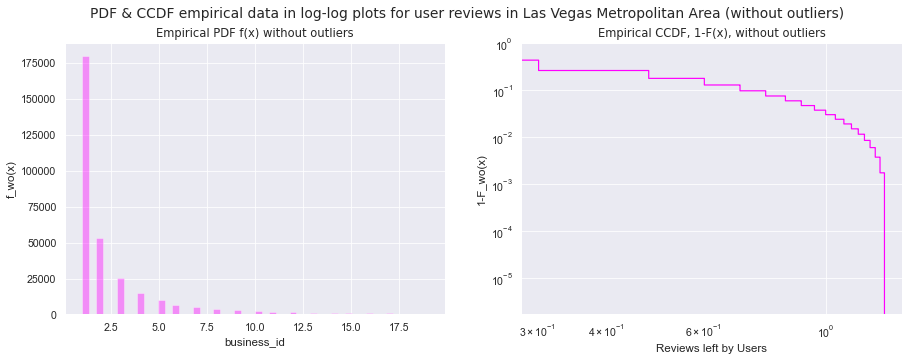

In [19]:
#Plots without outliers
sr = x
xnew = reject_outliers(sr, iq_range=0.5, side='left', return_mask=False)
fig, axes = plt.subplots(1, 2, figsize=(15,5))
fig.suptitle('PDF & CCDF empirical data in log-log plots for user reviews in Las Vegas Metropolitan Area (without outliers) ', **hfont)
axes[0].set_title('Empirical PDF f(x) without outliers', **hfont)
axes[1].set_title('Empirical CCDF, 1-F(x), without outliers', **hfont)
plt.yscale("log")
plt.xscale("log")
axes[0].set(xlabel="Reviews left by Users", ylabel = "f_wo(x)")
axes[1].set(xlabel="Reviews left by Users", ylabel = "1-F_wo(x)")
sns.ecdfplot(xnew, ax=axes[1], color='fuchsia', complementary=True)
sns.distplot(xnew, ax=axes[0], kde= False, color='fuchsia')
print ('Las Vegas mean', xnew.mean())
print('Las Vegas standard deviation',xnew.std())
print('Las Vegas excess kurtosis of normal distribution (should be 0): {}'.format( kurtosis(xnew) ))
print('Las Vegas skewness of normal distribution (should be 0): {}'.format( skew(xnew) ))


[distfit] >fit..
[distfit] >transform..
[distfit] >[norm      ] [0.00 sec] [RSS: 2.3892224] [loc=2.412 scale=2.737]
[distfit] >[expon     ] [0.00 sec] [RSS: 1.3710997] [loc=1.000 scale=1.412]
[distfit] >[pareto    ] [12.3 sec] [RSS: 2.8499091] [loc=1.000 scale=0.000]
[distfit] >[dweibull  ] [10.3 sec] [RSS: 1.9646419] [loc=1.000 scale=1.904]
[distfit] >[t         ] [9.75 sec] [RSS: 2.8498964] [loc=1.000 scale=0.000]
[distfit] >[genextreme] [31.2 sec] [RSS: 2.8499091] [loc=1.000 scale=0.000]
[distfit] >[gamma     ] [6.41 sec] [RSS: 0.9852459] [loc=1.000 scale=2.906]
[distfit] >[lognorm   ] [22.4 sec] [RSS: 2.0697368] [loc=1.000 scale=0.111]
[distfit] >[beta      ] [16.4 sec] [RSS: 1.2833331] [loc=1.000 scale=101.663]
[distfit] >[uniform   ] [0.00 sec] [RSS: 2.6955881] [loc=1.000 scale=18.000]
[distfit] >Compute confidence interval [parametric]
[distfit] >plot..


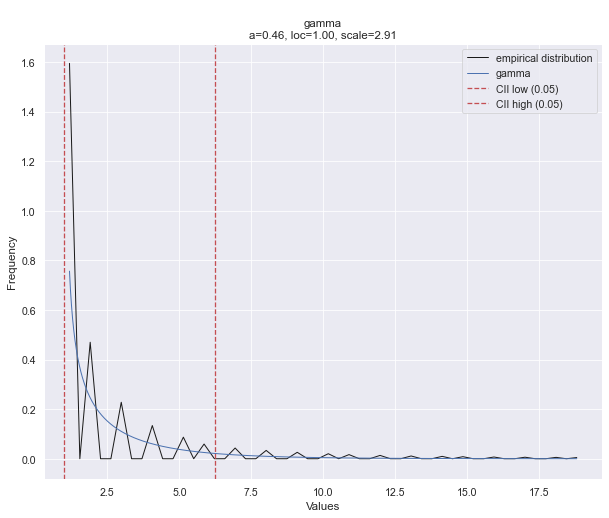

(<Figure size 720x576 with 1 Axes>,
 <AxesSubplot:title={'center':'\ngamma\na=0.46, loc=1.00, scale=2.91'}, xlabel='Values', ylabel='Frequency'>)

In [20]:
#https://pypi.org/project/distfit/#-Examples
#fitting a distribution using residual sum of squares without outliers
import distfit
from distfit import distfit
dist = distfit()
dist.fit_transform(xnew)
dist.plot()

        distr       RSS  LLE       loc       scale  \
0       gamma  0.985246  NaN       1.0     2.90566   
1        beta  1.283333  NaN       1.0  101.663202   
2       expon    1.3711  NaN       1.0    1.412496   
3    dweibull  1.964642  NaN       1.0    1.904488   
4     lognorm  2.069737  NaN       1.0     0.11061   
5        norm  2.389222  NaN  2.412496    2.736853   
6     uniform  2.695588  NaN       1.0        18.0   
7           t  2.849896  NaN       1.0         0.0   
8      pareto  2.849909  NaN       1.0         0.0   
9  genextreme  2.849909  NaN       1.0         0.0   

                                        arg  
0                     (0.4553815778809321,)  
1  (0.1606334429356525, 157.57100009665172)  
2                                        ()  
3                     (0.3655305272678835,)  
4                       (8.91841586197626,)  
5                                        ()  
6                                        ()  
7                     (0.317459089852

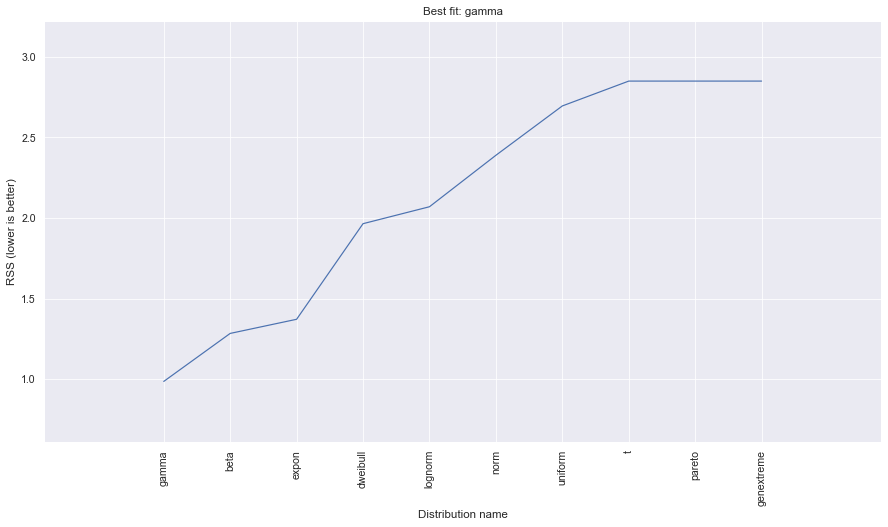

(<Figure size 1080x576 with 1 Axes>,
 <AxesSubplot:title={'center':'Best fit: gamma'}, xlabel='Distribution name', ylabel='RSS (lower is better)'>)

In [21]:
# All scores of the tested distributions
print(dist.summary)

# Distribution parameters for best fit
dist.model

# Make plot
dist.plot_summary()

In [22]:
#fitting the best continuous distribution using Kolmogorov test without outliers
#Distribution fit for business reviews 
#https://medium.com/@amirarsalan.rajabi/distribution-fitting-with-python-scipy-bb70a42c0aed
list_of_dists = 'beta','betaprime','cauchy','chi','dweibull','expon','exponnorm','exponweib','exponpow','fisk','gamma', 'genpareto','gennorm','genexpon','genextreme','gamma','gengamma','invgamma','invgauss','invweibull','loggamma','loglaplace','lognorm','ncx2','ncf','nct','norm','pareto','powerlaw','powerlognorm','powernorm','weibull_min','weibull_max'

results = []
for i in list_of_dists:
    dist = getattr(stats, i)
    param = dist.fit(xnew)
    a = stats.kstest(xnew, i, args=param)
    results.append((i,a[0],a[1]))
    print('Parameters for', i, 'are:', param)
    
results.sort(key=lambda x:float(x[2]), reverse=True)
for j in results:
    print("{}: statistic={}, pvalue={}".format(j[0], j[1], j[2]))

Parameters for beta are: (0.1606334429356525, 157.57100009665172, 0.9999999999999999, 101.6632016381936)
Parameters for betaprime are: (496.40366614639015, 0.4095071757520419, 0.9999995140641502, 1.1920217060269243e-09)
Parameters for cauchy are: (1.0, 5.07643885344616e-19)
Parameters for chi are: (0.5486027873203085, 0.9999999999999998, 3.300671746856562)
Parameters for dweibull are: (0.3655305272678835, 0.9999999999999998, 1.9044883134241655)
Parameters for expon are: (1.0, 1.4124959756723414)
Parameters for exponnorm are: (3345.4487167988154, 0.9983513195736293, 0.00042147700015832536)
Parameters for exponweib are: (4.078116003306311, 0.19460977960881104, 0.9999999999999999, 0.0023781803615518407)
Parameters for exponpow are: (0.7539519781694789, 0.9999999999999999, 6.380372133994774)
Parameters for fisk are: (0.2691653554527338, 0.9999999999999999, 1.152923340393885)
Parameters for gamma are: (0.4553815778809321, 0.9999999999999998, 2.905660463626765)
Parameters for genpareto are: 

In [23]:
##########################################################################################################
###################RQ.1_Subquestion_1 without outliers Visualizing the fits##############################
##########################################################################################################


In [356]:
#Here we are going to plot Brute force the best 2 plots we found using RSS and KS above without outliers
#For RSS: dist =  gamma, alpha = 0.4553815778809321, loc = 1.0, scale =2.90566 
import numpy as np
from scipy.stats import gamma 

#a = 0.4553815778809321
#scale =2.90566
#loc = 1.0
#bb = 1/scale
#lintest = np.linspace(0, 50, 150)
#gammaddensity = [x**(a-1)*np.exp(-x)/scipy.special.gamma(a) for x  in lintest] 

xxgamma = gamma.rvs(0.4553815778809321, loc=1.0, scale=2.90566, size=50 , random_state=None)

#gamatest = gamma.pdf(lintest, a, loc, scale)
#a, b, loc, scale = 0.16, 157.57, 0.9, 101.66
#betatest = beta.pdf(lintest, a,b, loc,scale)
#For KS: beta: statistic=0.5709593651811367, pvalue=0.0, Parameters for beta are: (0.1606334429356525, 157.57100009665172, 0.9999999999999999, 101.6632016381936)

from scipy.stats import beta
xxbeta = beta.rvs(0.1606334429356525, 157.57100009665172, loc=1.0, scale=101.6632016381936, size=50, random_state=None)



<function matplotlib.pyplot.show(close=None, block=None)>

<Figure size 1080x540 with 0 Axes>

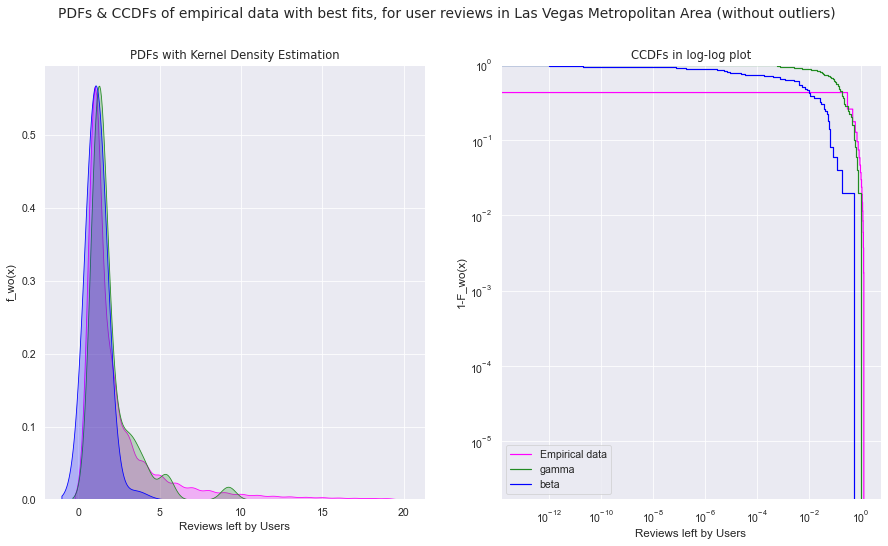

In [533]:

plt.figure(facecolor='w')
sns.set_style("darkgrid")

fig, axes = plt.subplots(1,2, figsize=(15,8))
fig.suptitle('PDFs & CCDFs of empirical data with best fits, for user reviews in Las Vegas Metropolitan Area (without outliers) ', **hfont)

axes[0].set_title('PDFs with Kernel Density Estimation', **hfont)
axes[1].set_title('CCDFs in log-log plot', **hfont)


#pplot(iris, x="sepal_length", y=gamma, hue="species", kind='qq', height=4, aspect=2, display_kws={"identity":True})


#plt.yscale("log")

plt.yscale("log")
plt.xscale("log")
#plt.xlim((0,20))
axes[0].set(xlabel="Reviews left by Users", ylabel = "f_wo(x)")
axes[1].set(xlabel="Reviews left by Users", ylabel = "1-F_wo(x)")

sns.ecdfplot(xnew, ax=axes[1], color='fuchsia',label = 'Empirical data', complementary=True)
#sns.ecdfplot(xnew, ax=axes[1], color='fuchsia', complementary=True)
sns.kdeplot(xnew, ax=axes[0], color='fuchsia', label = 'Empirical data', shade = True, bw = 0.15)

sns.ecdfplot(xxgamma, ax=axes[1], color='forestgreen', label = 'gamma', complementary=True)
#sns.ecdfplot(gamatest, ax=axes[1], label = 'gamma', complementary = True)
sns.kdeplot(xxgamma, ax=axes[0],color='forestgreen', label = 'gamma', shade = True, bw= 0.3)

sns.ecdfplot(xxbeta, ax=axes[1], color='blue', label = 'beta', complementary=True)
#sns.ecdfplot(betatest, ax=axes[1], label = 'beta', complementary=True)
sns.kdeplot(xxbeta, ax=axes[0],color='blue', shade = True, label = 'beta', bw = 1.87)

plt.legend()
plt.show

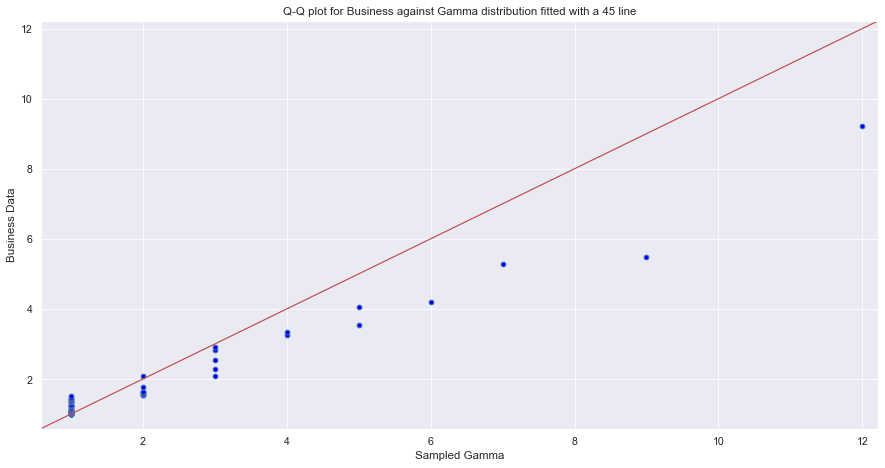

In [534]:
############################################################################################################
##QQ plot to determine the quantiles of the first data set against the quantiles of the second data set. ##################
###########################################################################################################
#https://www.statsmodels.org/devel/generated/statsmodels.graphics.gofplots.qqplot_2samples.html
import statsmodels.api as sm
from statsmodels.graphics.gofplots import qqplot_2samples
x = xnew
y = xxgamma
pp_x = np.sort(x)
pp_y = np.sort(y)
plt.rcParams["figure.figsize"] = (15,7.5)



plt.show()

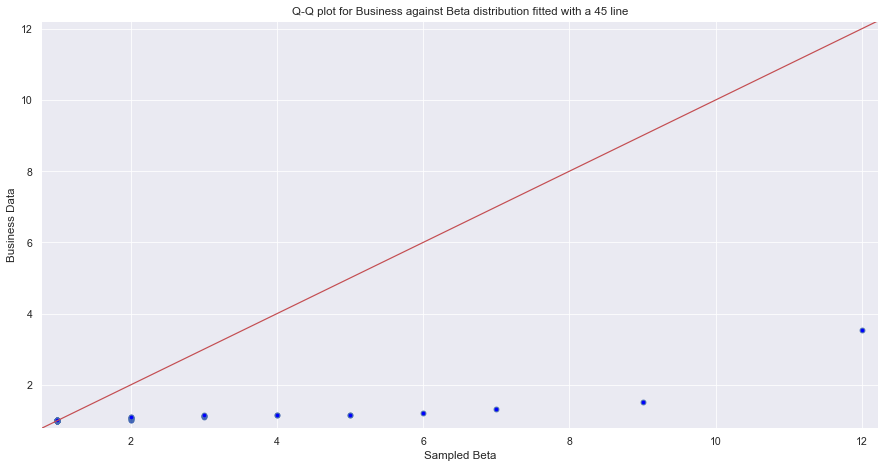

In [535]:
x = xnew
y = xxbeta
pp_x = np.sort(x)
pp_y = np.sort(y)

plt.rcParams["figure.figsize"] = (15,7.5)

qqplot_2samples(pp_x, pp_y, xlabel="Business Data", ylabel="Sampled Beta", line="45", ax=None)
plt.title("Q-Q plot for Business against Beta distribution fitted with a 45 line")
plt.show()

In [26]:
##########################################################################################################
#####################################RQ.1_Subquestion_2 with outliers#####################################
##########################################################################################################

No handles with labels found to put in legend.


Las Vegas mean 51.88175642414099
Las Vegas standard deviation 170.88584360406853
Las Vegas excess kurtosis of normal distribution (should be 0): 212.91212241855428
Las Vegas skewness of normal distribution (should be 0): 11.686002734085443


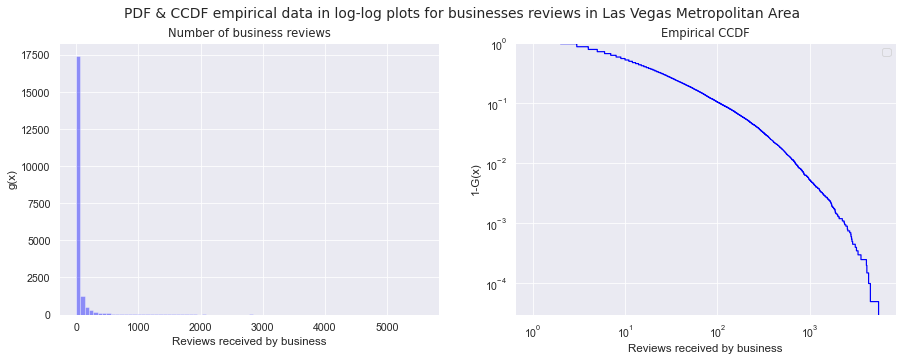

In [27]:
sns.set(context='paper', style='darkgrid', rc={'figure.facecolor':'white'}, font_scale=1.2)

fig, axes = plt.subplots(1, 2, figsize=(15,5))
fig.suptitle('PDF & CCDF empirical data in log-log plots for businesses reviews in Las Vegas Metropolitan Area ', **hfont)



sns.distplot(y, ax=axes[0], color='blue', kde = False,  label='Las Vegas', bins = 80)  
sns.ecdfplot(y, ax=axes[1], color='blue', complementary=True)

axes[0].set(xlabel="Reviews received by business", ylabel = "g(x)")
axes[1].set(xlabel="Reviews received by business", ylabel = "1-G(x)")

axes[0].set_title('Number of business reviews', **hfont)
axes[1].set_title('Empirical CCDF', **hfont)

plt.yscale("log")
plt.xscale("log")
plt.legend()

print ('Las Vegas mean', y.mean())
print('Las Vegas standard deviation',y.std())
print('Las Vegas excess kurtosis of normal distribution (should be 0): {}'.format( kurtosis(y) ))
print('Las Vegas skewness of normal distribution (should be 0): {}'.format( skew(y) ))


plt.show()

[distfit] >fit..
[distfit] >transform..
[distfit] >[norm      ] [0.00 sec] [RSS: 0.0000367] [loc=51.882 scale=170.882]
[distfit] >[expon     ] [0.00 sec] [RSS: 0.0000026] [loc=1.000 scale=50.882]
[distfit] >[pareto    ] [0.58 sec] [RSS: 0.0000407] [loc=-1.106 scale=2.106]
[distfit] >[dweibull  ] [0.77 sec] [RSS: 0.0000424] [loc=4.000 scale=28.629]
[distfit] >[t         ] [0.15 sec] [RSS: 0.0000528] [loc=6.726 scale=4.816]
[distfit] >[genextreme] [0.93 sec] [RSS: 0.0000358] [loc=7.511 scale=8.171]
[distfit] >[gamma     ] [0.30 sec] [RSS: 0.0000668] [loc=1.000 scale=3.999]
[distfit] >[lognorm   ] [0.30 sec] [RSS: 0.0000275] [loc=0.928 scale=12.537]
[distfit] >[beta      ] [0.63 sec] [RSS: 0.0000171] [loc=1.000 scale=77461.304]
[distfit] >[uniform   ] [0.0 sec] [RSS: 0.0000651] [loc=1.000 scale=5557.000]
[distfit] >Compute confidence interval [parametric]
[distfit] >plot..


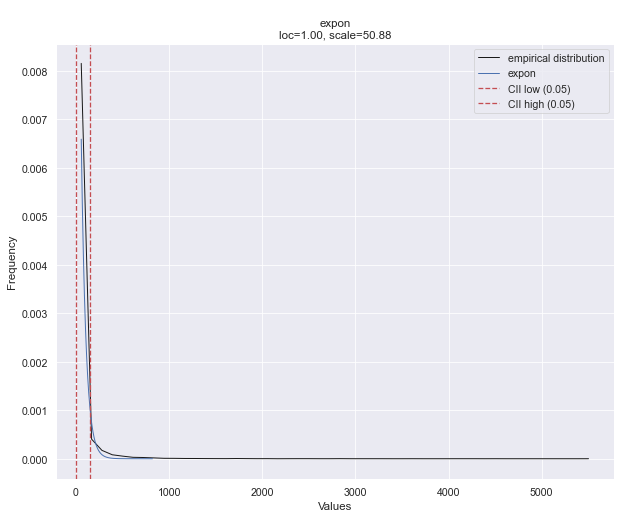

(<Figure size 720x576 with 1 Axes>,
 <AxesSubplot:title={'center':'\nexpon\nloc=1.00, scale=50.88'}, xlabel='Values', ylabel='Frequency'>)

In [28]:
#https://pypi.org/project/distfit/#-Examples
#fitting a distribution using residual sum of squares with outliers
import distfit
from distfit import distfit
dist = distfit()
dist.fit_transform(y)
dist.plot()

        distr       RSS  LLE        loc         scale  \
0       expon  0.000003  NaN        1.0     50.881756   
1        beta  0.000017  NaN        1.0  77461.304243   
2     lognorm  0.000027  NaN   0.928337     12.537243   
3  genextreme  0.000036  NaN   7.511489      8.170677   
4        norm  0.000037  NaN  51.881756    170.881637   
5      pareto  0.000041  NaN  -1.106146      2.106146   
6    dweibull  0.000042  NaN        4.0     28.628728   
7           t  0.000053  NaN   6.726322      4.816107   
8     uniform  0.000065  NaN        1.0        5557.0   
9       gamma  0.000067  NaN        1.0      3.999135   

                                        arg  
0                                        ()  
1  (0.44742356809304884, 715.1378247421305)  
2                     (1.5281151000619677,)  
3                    (-1.1429712747807268,)  
4                                        ()  
5                     (0.4398704882336823,)  
6                     (0.4953474653469023,)  
7   

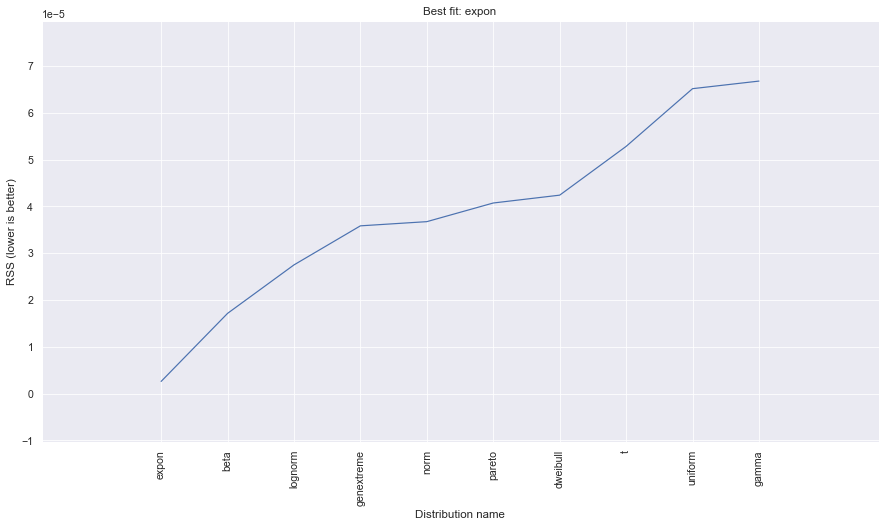

(<Figure size 1080x576 with 1 Axes>,
 <AxesSubplot:title={'center':'Best fit: expon'}, xlabel='Distribution name', ylabel='RSS (lower is better)'>)

In [29]:
# All scores of the tested distributions
print(dist.summary)

# Distribution parameters for best fit
dist.model

# Make plot
dist.plot_summary()

In [30]:
#fitting the best continuous distribution using Kolmogorov test with outliers 
#Distribution fit for business reviews 
#https://medium.com/@amirarsalan.rajabi/distribution-fitting-with-python-scipy-bb70a42c0aed
list_of_dists = 'beta','betaprime','cauchy','chi','dweibull','expon','exponnorm','exponweib','exponpow','fisk','genpareto','gennorm','genexpon','genextreme','gamma','gengamma','invgamma','invgauss','invweibull','loggamma','loglaplace','lognorm','ncx2','ncf','nct','norm','pareto','powerlaw','powerlognorm','powernorm','weibull_min','weibull_max'

results = []
for i in list_of_dists:
    dist = getattr(stats, i)
    param = dist.fit(y)
    a = stats.kstest(y, i, args=param)
    results.append((i,a[0],a[1]))
    print('Parameters for', i, 'are:', param)
    
results.sort(key=lambda x:float(x[2]), reverse=True)
for j in results:
    print("{}: statistic={}, pvalue={}".format(j[0], j[1], j[2]))

Parameters for beta are: (0.44742356809304884, 715.1378247421305, 0.9999999999999999, 77461.30424283541)
Parameters for betaprime are: (171.3320658571439, 0.8369979638325558, 0.26268810323427727, 0.033976737166581464)
Parameters for cauchy are: (7.993348790419004, 6.85093391889831)
Parameters for chi are: (0.3002886854148866, 0.9999999999999998, 177.5269509423769)
Parameters for dweibull are: (0.4953474653469023, 3.9999999999999996, 28.62872783550939)
Parameters for expon are: (1.0, 50.88175642414099)
Parameters for exponnorm are: (131.83862920073153, 1.2607018293846082, 0.38396223248474)
Parameters for exponweib are: (1.5749578192399127, 0.4863364451437827, 0.9999999999999999, 13.72631041359844)
Parameters for exponpow are: (0.2925711015420118, 0.9999999999999999, 728.5589171773992)
Parameters for fisk are: (1.1376658957437802, 0.9909803808643614, 11.307943144882342)
Parameters for genpareto are: (0.9088474702916196, 0.9999999999426066, 12.09033109551326)
Parameters for gennorm are: (

In [31]:
# outliers are screwing up the histogram... 
# adapted from http://stackoverflow.com/questions/11686720/is-there-a-numpy-builtin-to-reject-outliers-from-a-list
# we're using interquartile range to determine outliers
def reject_outliers(sr, iq_range=0.95, side='left', return_mask=False):
    """
    Takes an array (or pandas series) and returns an array with outliers excluded, according to the
    interquartile range.
    
    Parameters:
    -----------
    sr: array
        array of numeric values
    iq_range: float
        percent to calculate quartiles by, 0.5 will yield 25% and 75%ile quartiles
    side: string
        if 'left', will return everything below the highest quartile
        if 'right', will return everything above the lowest quartile
        if 'both', will return everything between the high and low quartiles
    """
    pcnt = (1 - iq_range) / 2
    qlow, median, qhigh = sr.dropna().quantile([0, 0.475, 1-0.05])
    iqr = qhigh - qlow
    if side=='both':
        mask = (sr - median).abs() <= iqr
    elif side=='left':
        mask = (sr - median) <= iqr
    elif side=='right':
        mask = (sr - median) >= iqr
    else:
        print('options for side are left, right, or both')
    
    if return_mask:
        return mask
    
    return sr[mask]

Las Vegas mean 25.722101673899566
Las Vegas standard deviation 38.011465581112894
Las Vegas excess kurtosis of normal distribution (should be 0): 8.115005788042971
Las Vegas skewness of normal distribution (should be 0): 2.752234304590248


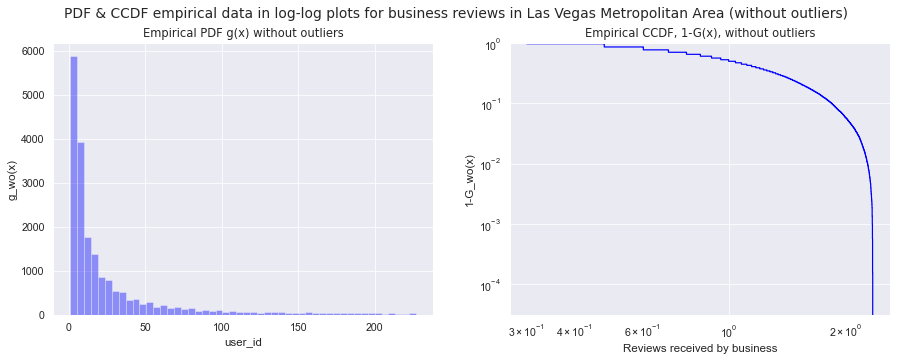

In [32]:
#Plots without outliers
sr = y
ynew = reject_outliers(sr, iq_range=0.5, side='left', return_mask=False)

fig, axes = plt.subplots(1, 2, figsize=(15,5))
fig.suptitle('PDF & CCDF empirical data in log-log plots for business reviews in Las Vegas Metropolitan Area (without outliers) ', **hfont)

axes[0].set_title('Empirical PDF g(x) without outliers', **hfont)
axes[1].set_title('Empirical CCDF, 1-G(x), without outliers', **hfont)

plt.yscale("log")
plt.xscale("log")

axes[0].set(xlabel= "Reviews received by business", ylabel = "g_wo(x)",)
axes[1].set(xlabel= "Reviews received by business", ylabel = "1-G_wo(x)")

sns.ecdfplot(ynew, ax=axes[1], color='blue', complementary=True)
sns.distplot(ynew, ax=axes[0], kde= False, color='blue')

print ('Las Vegas mean', ynew.mean())
print('Las Vegas standard deviation',ynew.std())
print('Las Vegas excess kurtosis of normal distribution (should be 0): {}'.format( kurtosis(ynew) ))
print('Las Vegas skewness of normal distribution (should be 0): {}'.format( skew(ynew) ))


[distfit] >fit..
[distfit] >transform..
[distfit] >[norm      ] [0.00 sec] [RSS: 0.0050898] [loc=25.722 scale=38.010]
[distfit] >[expon     ] [0.00 sec] [RSS: 0.0014016] [loc=1.000 scale=24.722]
[distfit] >[pareto    ] [0.30 sec] [RSS: 0.0006158] [loc=-0.854 scale=1.854]
[distfit] >[dweibull  ] [0.68 sec] [RSS: 0.0028059] [loc=5.000 scale=36.449]
[distfit] >[t         ] [0.12 sec] [RSS: 0.0012492] [loc=7.064 scale=5.141]
[distfit] >[genextreme] [0.58 sec] [RSS: 0.0001662] [loc=7.013 scale=6.829]
[distfit] >[gamma     ] [0.20 sec] [RSS: 0.0006830] [loc=1.000 scale=33.515]
[distfit] >[lognorm   ] [0.18 sec] [RSS: 0.0000778] [loc=0.876 scale=10.613]
[distfit] >[beta      ] [0.61 sec] [RSS: 0.0007750] [loc=1.000 scale=1434.121]
[distfit] >[uniform   ] [0.00 sec] [RSS: 0.0065566] [loc=1.000 scale=226.000]
[distfit] >Compute confidence interval [parametric]
[distfit] >plot..


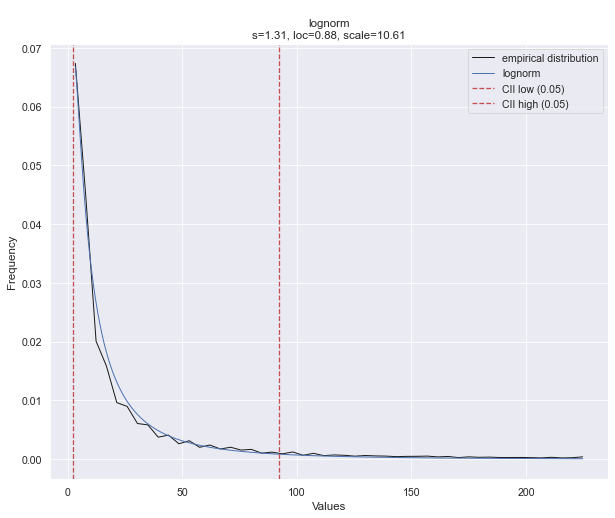

(<Figure size 720x576 with 1 Axes>,
 <AxesSubplot:title={'center':'\nlognorm\ns=1.31, loc=0.88, scale=10.61'}, xlabel='Values', ylabel='Frequency'>)

In [33]:
#https://pypi.org/project/distfit/#-Examples
#fitting a distribution using residual sum of squares without outliers
import distfit
from distfit import distfit
dist = distfit()
dist.fit_transform(ynew)
dist.plot()

        distr       RSS  LLE        loc        scale  \
0     lognorm  0.000078  NaN   0.876173    10.612962   
1  genextreme  0.000166  NaN   7.013152     6.829065   
2      pareto  0.000616  NaN  -0.854306     1.854306   
3       gamma  0.000683  NaN        1.0     33.51516   
4        beta  0.000775  NaN        1.0  1434.121338   
5           t  0.001249  NaN   7.064251     5.140528   
6       expon  0.001402  NaN        1.0    24.722102   
7    dweibull  0.002806  NaN        5.0    36.449403   
8        norm   0.00509  NaN  25.722102    38.010484   
9     uniform  0.006557  NaN        1.0        226.0   

                                       arg  
0                    (1.3085295774393648,)  
1                   (-0.9819997525702175,)  
2                    (0.4821706637284605,)  
3                    (0.7035844777405265,)  
4  (0.6853011306662049, 39.03370776390944)  
5                    (0.7989578681772822,)  
6                                       ()  
7                    (0

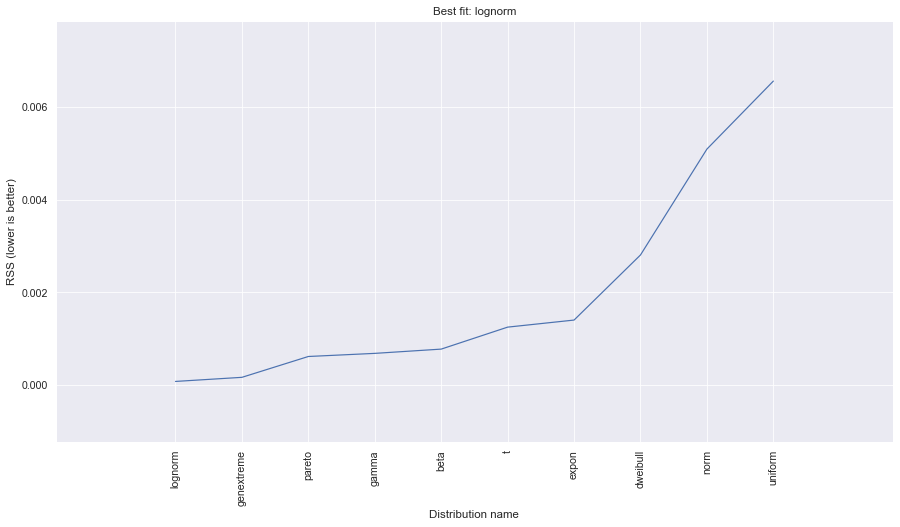

(<Figure size 1080x576 with 1 Axes>,
 <AxesSubplot:title={'center':'Best fit: lognorm'}, xlabel='Distribution name', ylabel='RSS (lower is better)'>)

In [34]:
# All scores of the tested distributions
print(dist.summary)

# Distribution parameters for best fit
dist.model

# Make plot
dist.plot_summary()

In [35]:
#fitting the best continuous distribution using Kolmogorov test without outliers
#Distribution fit for business reviews 
#https://medium.com/@amirarsalan.rajabi/distribution-fitting-with-python-scipy-bb70a42c0aed
list_of_dists = 'beta','betaprime','cauchy','chi','dweibull','expon','exponnorm','exponweib','exponpow','fisk','gamma', 'genpareto','gennorm','genexpon','genextreme','gamma','gengamma','invgamma','invgauss','invweibull','loggamma','loglaplace','lognorm','ncx2','ncf','nct','norm','pareto','powerlaw','powerlognorm','powernorm','weibull_min','weibull_max'

results = []
for i in list_of_dists:
    dist = getattr(stats, i)
    param = dist.fit(ynew)
    a = stats.kstest(ynew, i, args=param)
    results.append((i,a[0],a[1]))
    print('Parameters for', i, 'are:', param)
    
results.sort(key=lambda x:float(x[2]), reverse=True)
for j in results:
    print("{}: statistic={}, pvalue={}".format(j[0], j[1], j[2]))

Parameters for beta are: (0.6853011306662049, 39.03370776390944, 0.9999999999999999, 1434.121337926354)
Parameters for betaprime are: (73.79438095036568, 1.0769698351315657, -0.05497372113478122, 0.10564608079301618)
Parameters for cauchy are: (7.669685599061118, 6.0529806416272365)
Parameters for chi are: (0.4841972959964457, 0.9999999999999998, 58.36516398374718)
Parameters for dweibull are: (0.6062704156552803, 5.000000000000001, 36.44940272505232)
Parameters for expon are: (1.0, 24.722101673899566)
Parameters for exponnorm are: (53.69358523570485, 1.5789700783746925, 0.44964647624906995)
Parameters for exponweib are: (1.5736888893322876, 0.6150942242660731, 0.9999999999999999, 10.745564556986661)
Parameters for exponpow are: (0.4966058930143923, 0.9999999999999999, 100.88205514448907)
Parameters for fisk are: (1.2848357641763277, 0.9768028924813861, 9.96408300155618)
Parameters for gamma are: (0.7035844777405265, 0.9999999999999998, 33.5151597189803)
Parameters for genpareto are: (

In [36]:
##########################################################################################################
###################RQ.1_Subquestion_2 without outliers Visualizing the fits##############################
##########################################################################################################

In [450]:
#Here we are going to plot Brute force the best 2 plots we found using RSS and KS above without outliers

#For RSS: dist =  lognorm, 1.3085295774393648, loc = 0.876173, scale = 10.612962
xxx=np.linspace(0, 20, endpoint=True, retstep=False, dtype=None, axis=0)
from scipy.stats import lognorm
yylgnrm = lognorm.rvs(1.3085295774393648, loc = 0.876173, scale = 10.612962, size=len(xnew), random_state=None)
#xxgamma = gamma.rvs(0.4553815778809321, loc=1.0, scale=2.90566, size=len(x), random_state=None)
#yyplgn = np.log(yyplgn)
#For KS: invgauss: statistic=0.06371881923376876, pvalue=9.15730812738226e-69, Parameters for invgauss are: (3.0720170694854687, 0.43683962915135255, 8.230802019012803)
from scipy.stats import invgauss
yyinv = invgauss.rvs(3.0720170694854687, loc= 0.43683962915135255, scale=8.230802019012803, size= len(xnew), random_state=None)
#yyinvv = np.log(yyinv)
#yyplgn[:100]
max(yyinv)

1186.2883790517915

In [100]:
#yyplgn = invgauss.fit(xnew, 3.0720170694854687, loc=0.3938085188534692, scale= 1.6843588426346068)

<Figure size 1080x540 with 0 Axes>

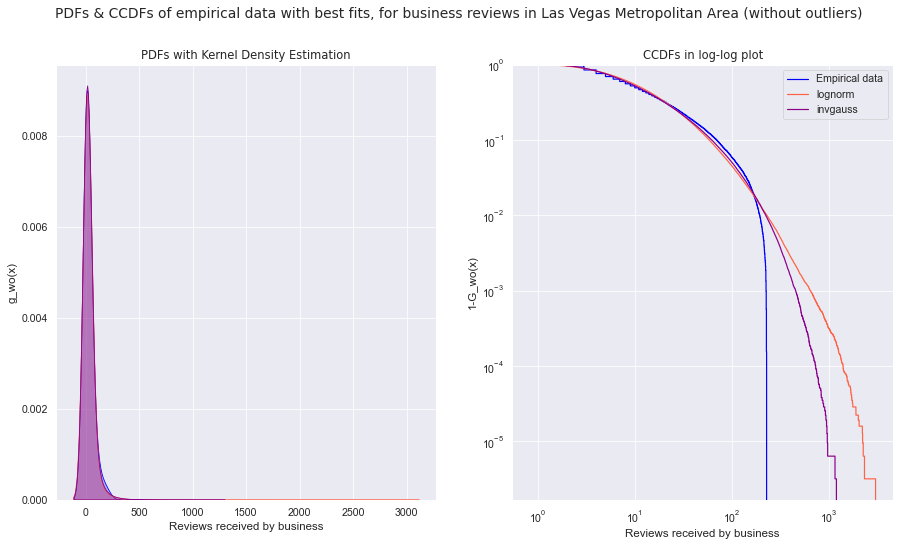

In [532]:

plt.figure(facecolor='w')
sns.set_style("darkgrid")

fig, axes = plt.subplots(1, 2, figsize=(15,8))
fig.suptitle('PDFs & CCDFs of empirical data with best fits, for business reviews in Las Vegas Metropolitan Area (without outliers) ', **hfont)

axes[0].set_title('PDFs with Kernel Density Estimation', **hfont)
axes[1].set_title('CCDFs in log-log plot', **hfont)


#plt.xlim( (-10, 300) )
axes[0].set(xlabel="Reviews received by business", ylabel = "g_wo(x)")
axes[1].set(xlabel="Reviews received by business", ylabel = "1-G_wo(x)")


sns.ecdfplot(ynew, ax=axes[1], color='blue',label= 'Empirical data', complementary=True)
sns.kdeplot(ynew, ax=axes[0], color = 'blue', shade=True, label= 'Empirical data', bw=0.99)

sns.ecdfplot(yylgnrm, ax=axes[1], label = 'lognorm', color = 'tomato' ,complementary=True)
sns.kdeplot(yylgnrm, ax=axes[0], label = 'lognorm', color = 'tomato', shade = True, bw=0.73)


sns.ecdfplot(yyinv, ax=axes[1], label = 'invgauss', color='darkmagenta', complementary=True)
sns.kdeplot(yyinv, ax=axes[0], label = 'invgauss', color='darkmagenta', shade=True, bw=0.85)

plt.yscale("log")
plt.xscale("log")


plt.legend()
plt.show()

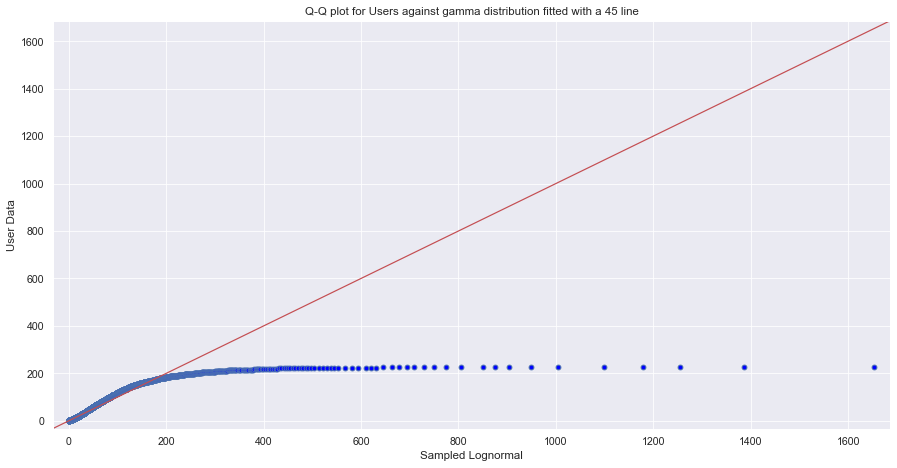

In [568]:
############################################################################################################
##QQ plot to determine the quantiles of the first data set against the quantiles of the second data set. ##################
###########################################################################################################
#https://www.statsmodels.org/devel/generated/statsmodels.graphics.gofplots.qqplot_2samples.html
import statsmodels.api as sm
from statsmodels.graphics.gofplots import qqplot_2samples

plt.rcParams["figure.figsize"] = (15,7.5)
y = ynew
x = yylgnrm
pp_x = np.sort(x)
pp_y = np.sort(y)

qqplot_2samples(pp_x, pp_y, xlabel="User Data", ylabel="Sampled Lognormal", line="45", ax=None)
plt.title("Q-Q plot for Users against gamma distribution fitted with a 45 line")
plt.show()

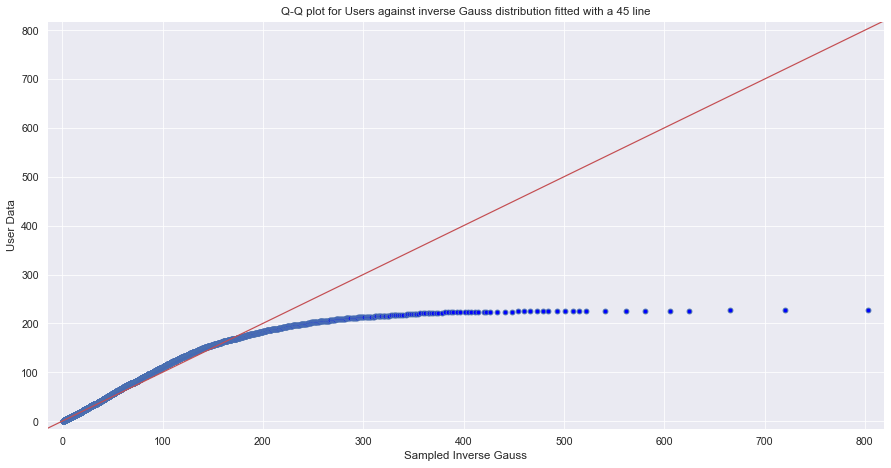

In [569]:
############################################################################################################
##QQ plot to determine the quantiles of the first data set against the quantiles of the second data set. ##################
###########################################################################################################
#https://www.statsmodels.org/devel/generated/statsmodels.graphics.gofplots.qqplot_2samples.html
import statsmodels.api as sm
from statsmodels.graphics.gofplots import qqplot_2samples
plt.rcParams["figure.figsize"] = (15,7.5)
y = ynew
x = yyinv
pp_x = np.sort(x)
pp_y = np.sort(y)

qqplot_2samples(pp_x, pp_y, xlabel="User Data", ylabel="Sampled Inverse Gauss", line="45", ax=None)
plt.title("Q-Q plot for Users against inverse Gauss distribution fitted with a 45 line")
plt.show()

<Figure size 1080x540 with 0 Axes>

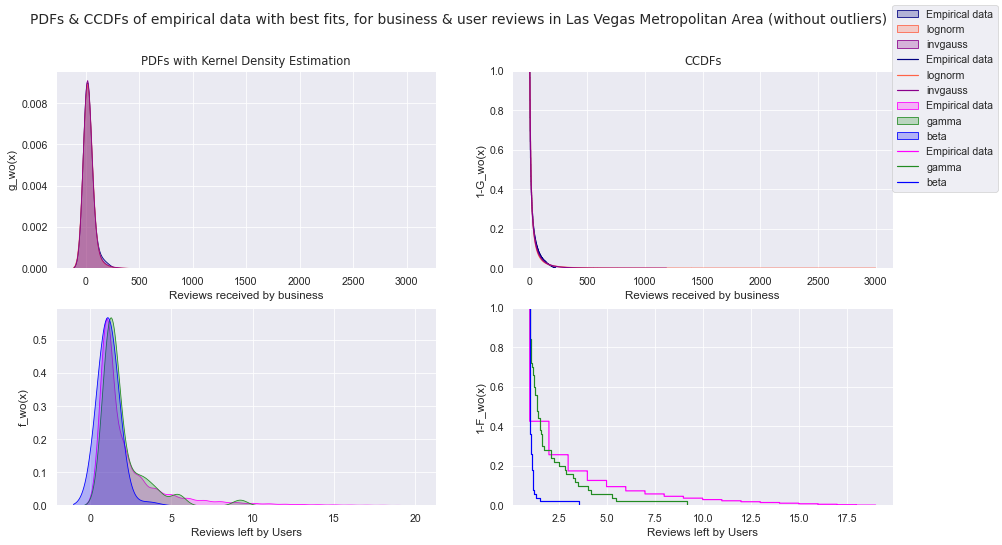

In [555]:

plt.figure(facecolor='w')
sns.set_style("darkgrid")




fig, axes = plt.subplots(2, 2, figsize=(15,8))
fig.suptitle('PDFs & CCDFs of empirical data with best fits, for business & user reviews in Las Vegas Metropolitan Area (without outliers) ', **hfont)

axes[0,0].set_title('PDFs with Kernel Density Estimation', **hfont)
axes[0,1].set_title('CCDFs', **hfont)

axes[1,0].set(xlabel="Reviews left by Users", ylabel = "f_wo(x)")
axes[1,1].set(xlabel="Reviews left by Users", ylabel = "1-F_wo(x)")

sns.ecdfplot(xnew, ax=axes[1,1], color='fuchsia',label = 'Empirical data', complementary=True)
#sns.ecdfplot(xnew, ax=axes[1], color='fuchsia', complementary=True)
sns.kdeplot(xnew, ax=axes[1,0], color='fuchsia', label = 'Empirical data', shade = True, bw = 0.15)

sns.ecdfplot(xxgamma, ax=axes[1,1], color='forestgreen', label = 'gamma', complementary=True)
#sns.ecdfplot(gamatest, ax=axes[1], label = 'gamma', complementary = True)
sns.kdeplot(xxgamma, ax=axes[1,0],color='forestgreen', label = 'gamma', shade = True, bw= 0.30)

sns.ecdfplot(xxbeta, ax=axes[1,1], color='blue', label = 'beta', complementary=True)
#sns.ecdfplot(betatest, ax=axes[1], label = 'beta', complementary=True)
sns.kdeplot(xxbeta, ax=axes[1,0],color='blue', shade = True, label = 'beta', bw = 1.87)


#plt.xlim( (-10, 300) )
axes[0,0].set(xlabel="Reviews received by business", ylabel = "g_wo(x)")
axes[0,1].set(xlabel="Reviews received by business", ylabel = "1-G_wo(x)")


sns.ecdfplot(ynew, ax=axes[0,1], color='navy',label= 'Empirical data', complementary=True)
sns.kdeplot(ynew, ax=axes[0,0], color = 'navy', shade=True, label= 'Empirical data', bw=0.99)

sns.ecdfplot(yylgnrm, ax=axes[0,1], label = 'lognorm', color = 'tomato' ,complementary=True)
sns.kdeplot(yylgnrm, ax=axes[0,0], label = 'lognorm', color = 'tomato', shade = True, bw=0.73)


sns.ecdfplot(yyinv, ax=axes[0,1], label = 'invgauss', color='darkmagenta', complementary=True)
sns.kdeplot(yyinv, ax=axes[0,0], label = 'invgauss', color='darkmagenta', shade=True, bw=0.85)




fig.legend()
plt.show()